# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "../Data/Mouse_Metadata.csv"
study_results_path = "../Data/Study_Results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice
len(study_data_complete["Mouse ID"].unique())

249

In [7]:
# Getting duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [8]:
# Get all the data for the duplicate mouse ID.
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Clean the DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mouse_ids) == False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [12]:
# Checking the number of mice in the clean DataFrame
len(clean_study_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [13]:
# Summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

means = clean_study_data_complete.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = clean_study_data_complete.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = clean_study_data_complete.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sds = clean_study_data_complete.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = clean_study_data_complete.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_table = pd.DataFrame({"Mean Tumor Volume": means,
                             "Median Tumor Volume": medians,
                             "Tumor Volume Variances": variances,
                             "Tumor Volume Std. Dev.":sds,
                             "Tumor Volume Std. Err.": sems})

summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variances,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_table = clean_study_data_complete.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

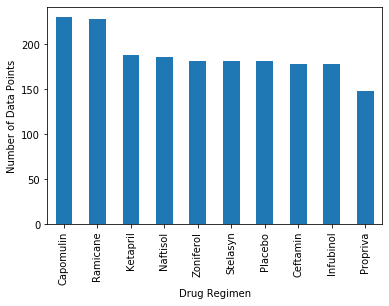

In [17]:
# Bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

counts = clean_study_data_complete['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

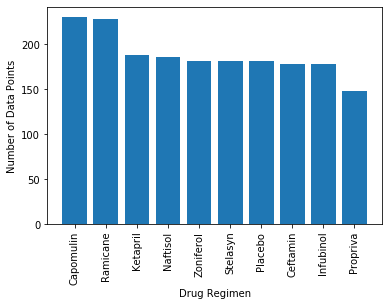

In [18]:
# Bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

counts = clean_study_data_complete['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

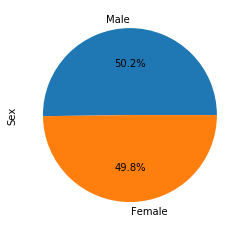

In [19]:
# Pie plot showing the distribution of female versus male mice using pandas

counts = mouse_metadata.Sex.value_counts()
counts.plot(kind="pie", autopct='%1.1f%%')
# plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.show()

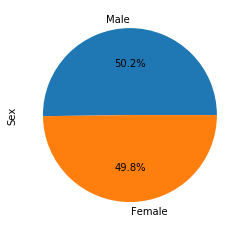

In [20]:
counts = mouse_metadata.Sex.value_counts()
counts
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Getting the last (greatest) timepoint for each mouse
max_tumor = clean_study_data_complete.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()

# Merge the group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor[['Mouse ID','Timepoint']].merge(clean_study_data_complete,on=['Mouse ID','Timepoint'],how="left")

capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

# Quantitavely determine capomulin outliers
cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < cap_lower_bound) | (capomulin > cap_upper_bound)]}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [23]:
# Quantitatively determine ramicane outliers
ram_quartiles = ramicane.quantile([0.25,0.5,0.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq - ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Ramicane potential outliers: {ramicane.loc[(ramicane < ram_lower_bound) | (ramicane > ram_upper_bound)]}")

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [26]:
# Quantitatively determine ceftamin outliers
cef_quartiles = ceftamin.quantile([0.25,0.5,0.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq - cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Ceftamine potential outliers: {ceftamin.loc[(ceftamin < cef_lower_bound) | (ceftamin > cef_upper_bound)]}")

Ceftamine potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


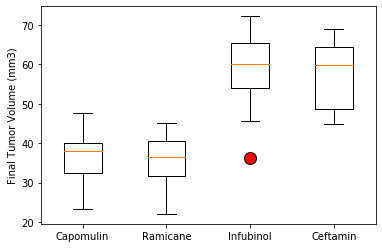

In [28]:
# Box plot of the final tumor volume of each mouse across four regimens 

orange_out = dict(markerfacecolor = 'red', markersize = 12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()